Hill And Velley Predicton Using Logistic Regression

Import labraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv(r"/content/sample_data/Hill Valley Dataset.csv") #read csv file
df.head() #display first 5 rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [62]:
df.describe() #no outliers

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [63]:
df.isnull().sum() #no null values

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V97      0
V98      0
V99      0
V100     0
Class    0
Length: 101, dtype: int64

In [64]:

df.dtypes #no object values

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
          ...   
V97      float64
V98      float64
V99      float64
V100     float64
Class      int64
Length: 101, dtype: object

In [65]:
df.shape, df.columns

((1212, 101),
 Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        ...
        'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
        'Class'],
       dtype='object', length=101))

In [66]:
df.duplicated().sum() #no duplicated values

0

In [67]:
df['Class'].value_counts() #no class imbalance

Class
0    606
1    606
Name: count, dtype: int64

In [68]:
df.groupby('Class').mean() #no class imbalance

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


Define y(dependaent or label or target variable) and x(independent or features or attribute variable

In [69]:
y = df['Class'] #dependent variable
x = df.drop('Class', axis=1) #independent variable
y.shape, x.shape

((1212,), (1212, 100))

Plot of First Two Rows

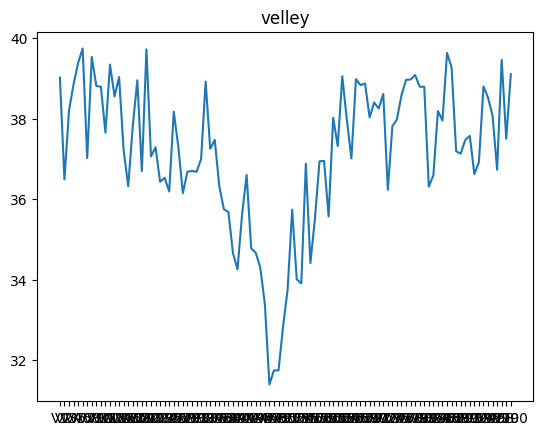

In [70]:
plt.plot(x.iloc[0, :])
plt.title('velley');
plt.show()

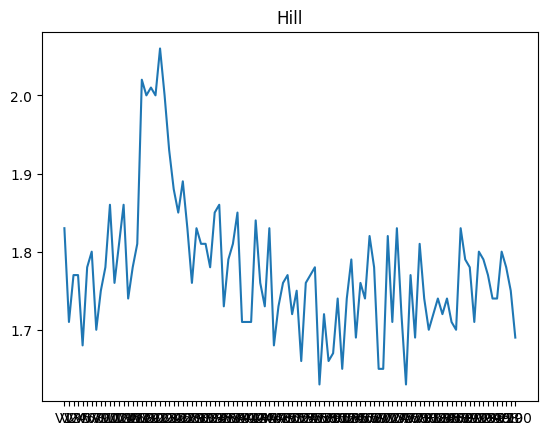

In [71]:
plt.plot(x.iloc[1,:])
plt.title('Hill');
plt.show()

Standardized x variabe

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [73]:
x.shape

(1212, 100)

Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2529)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((969, 100), (243, 100), (969,), (243,))

Model Selection

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


Training Model

In [76]:
model.fit(x_train, y_train)

LogisticRegression()

Model Prediction

In [77]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [78]:
y_pred.shape

(243,)

Get Probability of Each Predicted Class

In [79]:
model.predict_proba(x_test)

array([[0.49583582, 0.50416418],
       [0.44548993, 0.55451007],
       [0.59332078, 0.40667922],
       [0.78997286, 0.21002714],
       [0.49692523, 0.50307477],
       [0.51124409, 0.48875591],
       [0.51159845, 0.48840155],
       [0.51125885, 0.48874115],
       [0.51349243, 0.48650757],
       [0.51129834, 0.48870166],
       [0.5135215 , 0.4864785 ],
       [0.51120313, 0.48879687],
       [0.43782376, 0.56217624],
       [0.5112703 , 0.4887297 ],
       [0.51306564, 0.48693436],
       [0.51849854, 0.48150146],
       [0.51123853, 0.48876147],
       [0.50783125, 0.49216875],
       [0.51176297, 0.48823703],
       [0.5112219 , 0.4887781 ],
       [0.49785249, 0.50214751],
       [0.0474065 , 0.9525935 ],
       [0.40265628, 0.59734372],
       [0.51139105, 0.48860895],
       [0.01332329, 0.98667671],
       [0.49764351, 0.50235649],
       [0.51799242, 0.48200758],
       [0.51295685, 0.48704315],
       [0.45353062, 0.54646938],
       [0.5113649 , 0.4886351 ],
       [0.

Model Evaluation

In [80]:
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

In [81]:
confusion_matrix(y_test, y_pred)

array([[115,   3],
       [ 73,  52]])

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.97      0.75       118
           1       0.95      0.42      0.58       125

    accuracy                           0.69       243
   macro avg       0.78      0.70      0.66       243
weighted avg       0.78      0.69      0.66       243



In [83]:
accuracy_score(y_test, y_pred)

0.6872427983539094